<a href="https://colab.research.google.com/github/relfaza/Dimensionality-Reduction-PCA-t-SNE/blob/main/Dimensionality_Reduction_(PCA_%26_t_SNE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anggota Kelompok :     
- Farrel Faza (24523031)
- Muhammad Hafizh Hakim (24523062)

#1. Deskripsi Kasus: Visualisasi Data Medis Berdimensi Tinggi


#2. Kasus Penggunaan: Visualisasi Data dan Eksplorasi Cluster pada Data Medis.

- Masalah yang Dihadapi: Dataset Breast Cancer Wisconsin memiliki 30 fitur numerik (seperti radius, tekstur, keliling, dll) untuk menentukan sifat tumor. Karena manusia tidak bisa memvisualisasikan ruang 30 dimensi secara langsung, kita sulit melihat pola hubungan antar fitur atau seberapa jelas pemisahan antara tumor jinak (benign) dan ganas (malignant).

- Mengapa Dimensionality Reduction Dibutuhkan: Kita perlu mereduksi dimensi data dari 30D menjadi 2D. Dengan demikian, kita bisa memplot data tersebut ke dalam grafik kartesius (Scatter Plot) untuk melihat apakah pasien dengan tumor ganas dan jinak mengelompok di area yang berbeda secara alami.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

print(f"Ukuran Data Asli: {df.shape}")
print("Contoh 5 baris data pertama:")
df.head()

Ukuran Data Asli: (569, 31)
Contoh 5 baris data pertama:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#**Penerapan PCA**

Informasi pada PC1: 44.27%
Informasi pada PC2: 18.97%
Total Informasi yang terjaga: 63.24%


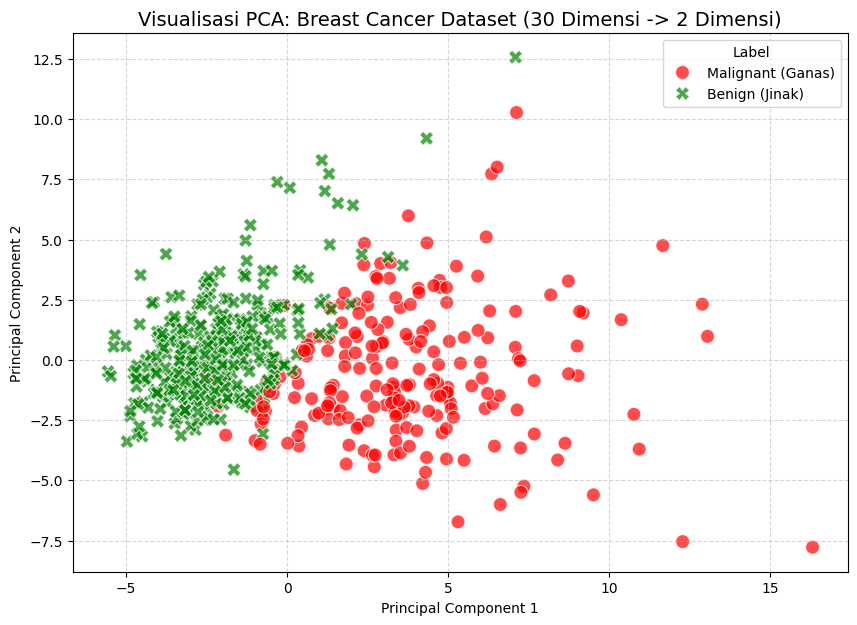

In [ ]:
# --- PENERAPAN PCA ---

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = df['target']  # Ambil label target dari data asli
df_pca['Label'] = df_pca['Target'].map({0: 'Malignant (Ganas)', 1: 'Benign (Jinak)'})

variance_ratio = pca.explained_variance_ratio_
print(f"Informasi pada PC1: {variance_ratio[0]*100:.2f}%")
print(f"Informasi pada PC2: {variance_ratio[1]*100:.2f}%")
print(f"Total Informasi yang terjaga: {sum(variance_ratio)*100:.2f}%")

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1', y='Principal Component 2',
    hue='Label',
    style='Label',
    data=df_pca,
    palette=['red', 'green'],
    s=100,
    alpha=0.7
)

plt.title('Visualisasi PCA: Breast Cancer Dataset (30 Dimensi -> 2 Dimensi)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Reduksi Dimensi: PCA berhasil mereduksi 30 fitur data medis menjadi 2 sumbu utama (PC1 dan PC2) dengan tetap mempertahankan sekitar 63% informasi penting dari data asli.

Pemisahan Cluster: Pada grafik, terlihat titik-titik Hijau (Jinak) cenderung berkumpul di sebelah kiri, sedangkan Merah (Ganas) di sebelah kanan. Meskipun ada sedikit percampuran di tengah, secara umum PCA mampu membedakan kedua jenis tumor ini dengan cukup baik hanya menggunakan pola linear.

#**Penerapan t-SNE**

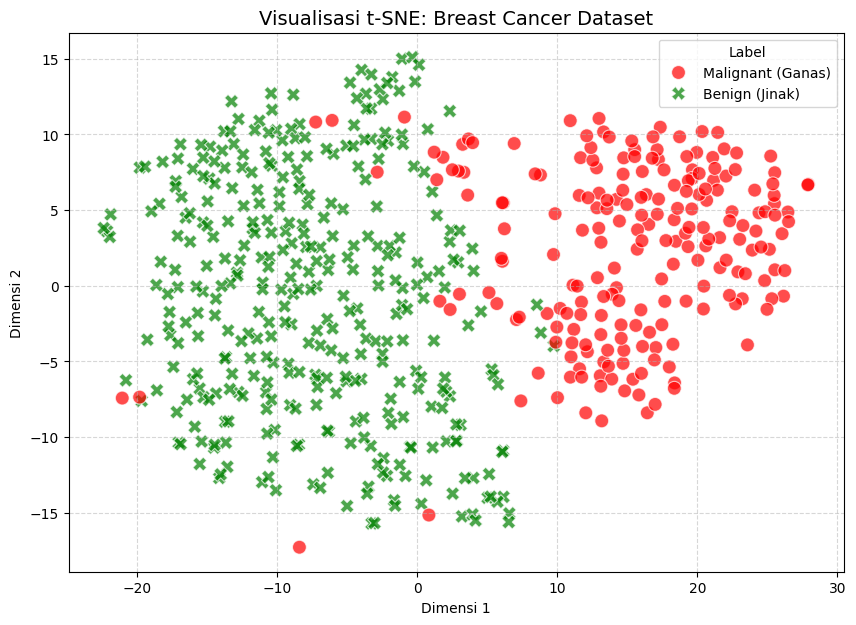

In [ ]:
# --- PENERAPAN t-SNE ---

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=tsne_result, columns=['Dimensi 1', 'Dimensi 2'])
df_tsne['Target'] = df['target']
df_tsne['Label'] = df_tsne['Target'].map({0: 'Malignant (Ganas)', 1: 'Benign (Jinak)'})

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Dimensi 1', y='Dimensi 2',
    hue='Label',
    style='Label',
    data=df_tsne,
    palette=['red', 'green'],
    s=100,
    alpha=0.7
)

plt.title('Visualisasi t-SNE: Breast Cancer Dataset', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Pembentukan Cluster yang Tegas: Berbeda dengan PCA yang masih sedikit menyatu, t-SNE berhasil membentuk dua "pulau" (cluster) yang terpisah sangat jelas antara tumor Ganas (Merah) dan Jinak (Hijau).

Struktur Lokal: Karena t-SNE fokus pada kemiripan antar tetangga terdekat, pasien dengan karakteristik tumor yang sangat mirip akan berkumpul rapat dalam satu grup. Ini membuktikan bahwa secara data, tumor ganas dan jinak memang memiliki ciri fisik yang sangat berbeda.

#**Analis Singkat**

1. Analisis Perbandingan: PCA vs t-SNE & Perbedaan Hasil Visualisasi

- PCA (Linear): Hasil visualisasi PCA menunjukkan pola penyebaran data yang memanjang. Meskipun kelompok tumor Malignant (Ganas) dan Benign (Jinak) sudah terpisah, masih terdapat area tumpang tindih (overlap) di perbatasan keduanya. PCA bekerja dengan mempertahankan variansi global data secara linear.

- t-SNE (Non-Linear): Hasil visualisasi t-SNE menunjukkan pemisahan yang jauh lebih tegas. Kedua kelompok data membentuk cluster (pulau) yang terpisah secara signifikan dengan jarak yang jelas. t-SNE bekerja dengan mempertahankan struktur lokal (hubungan antar tetangga terdekat).

2. Kesimpulan: Metode Mana yang Lebih Sesuai? Untuk kasus Visualisasi Data dan Eksplorasi Cluster pada dataset Breast Cancer ini, t-SNE lebih unggul.

- Alasannya: Tujuan utama visualisasi adalah memudahkan manusia melihat perbedaan antar kelas. t-SNE berhasil memproyeksikan data 30 dimensi ke 2 dimensi dengan batas pemisah yang sangat jelas (diskrit), sehingga kita bisa menyimpulkan dengan yakin bahwa karakteristik fisik tumor ganas dan jinak memang sangat berbeda. PCA lebih cocok jika tujuannya adalah feature extraction untuk input model machine learning agar lebih cepat, namun untuk visualisasi murni, t-SNE memberikan gambaran yang lebih intuitif.